<a href="https://colab.research.google.com/github/Lambru99/Fashion_MNIST_CNN/blob/main/Definitivo1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf


import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D
from keras.utils import plot_model
import seaborn as sns
import matplotlib.pyplot as plt
from keras.utils import to_categorical


In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape le immagini in modo da avere una dimensione aggiuntiva per il canale di colore (in questo caso 1, scala di grigi)
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# Converti le etichette in formato one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)


4422102/4422102 [==============================] - 0s 0us/step


In [3]:
labels = {0 : "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",
          5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle Boot"}

def get_classes_distribution(data):
    # Get the count for each label
    label_counts = data["label"].value_counts()

    # Get total number of samples
    total_samples = len(data)

CNN

In [4]:
model = tf.keras.Sequential()

# Convolutional layers
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1), name='conv1'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2, name='maxpool1'))
model.add(tf.keras.layers.Dropout(0.3, name='dropout1'))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu', name='conv2'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2, name='maxpool2'))
model.add(tf.keras.layers.Dropout(0.3, name='dropout2'))

# Flatten and dense layers
model.add(tf.keras.layers.Flatten(name='flatten'))
model.add(tf.keras.layers.Dense(256, activation='relu', name='dense1'))
model.add(tf.keras.layers.Dropout(0.5, name='dropout3'))
model.add(tf.keras.layers.Dense(10, activation='softmax', name='dense2'))


In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1 (Conv2D)              (None, 28, 28, 64)        320       
                                                                 
 maxpool1 (MaxPooling2D)     (None, 14, 14, 64)        0         
                                                                 
 dropout1 (Dropout)          (None, 14, 14, 64)        0         
                                                                 
 conv2 (Conv2D)              (None, 14, 14, 32)        8224      
                                                                 
 maxpool2 (MaxPooling2D)     (None, 7, 7, 32)          0         
                                                                 
 dropout2 (Dropout)          (None, 7, 7, 32)          0         
                                                                 
 flatten (Flatten)           (None, 1568)              0

In [6]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [7]:
cnn_results = model.fit(x_train,
         y_train,
         batch_size=32,
         epochs=10,
         validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 28s 7ms/step - loss: 0.5797 - accuracy: 0.7874 - val_loss: 0.3868 - val_accuracy: 0.8668
Epoch 2/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.4099 - accuracy: 0.8513 - val_loss: 0.3165 - val_accuracy: 0.8850
Epoch 3/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3619 - accuracy: 0.8696 - val_loss: 0.2930 - val_accuracy: 0.8915
Epoch 4/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3316 - accuracy: 0.8788 - val_loss: 0.2839 - val_accuracy: 0.8932
Epoch 5/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3109 - accuracy: 0.8846 - val_loss: 0.2707 - val_accuracy: 0.8987
Epoch 6/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2981 - accuracy: 0.8906 - val_loss: 0.2497 - val_accuracy: 0.9094
Epoch 7/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2846 - accuracy: 0.8940 - val_loss: 0.2487 - val_accuracy

In [8]:
# Evaluate the model on test set
score = model.evaluate(x_test, y_test, verbose=0)
# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.9101999998092651


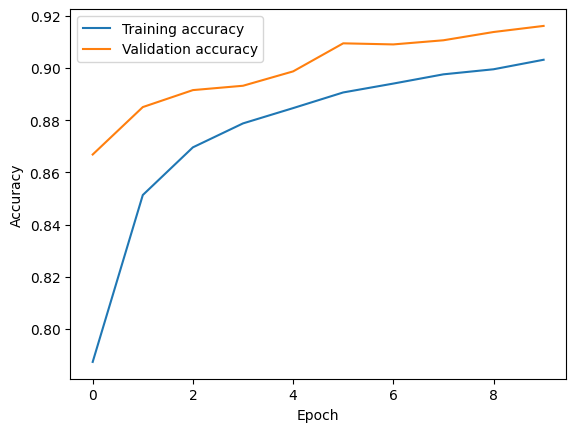

In [9]:
# Get training and validation accuracy
train_acc = cnn_results.history['accuracy']
val_acc = cnn_results.history['val_accuracy']

# Plot accuracy curves
plt.plot(train_acc, label='Training accuracy')
plt.plot(val_acc, label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
#plt.ylim(0.6, 1)  # Set y-axis limits
plt.show()


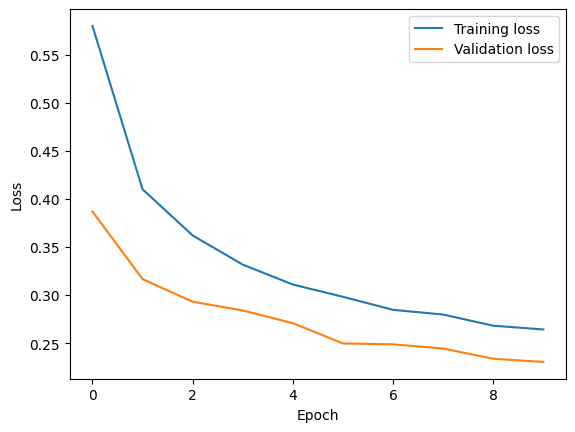

In [10]:
# Get training and validation loss
train_loss = cnn_results.history['loss']
val_loss = cnn_results.history['val_loss']

# Plot loss curves
plt.plot(train_loss, label='Training loss')
plt.plot(val_loss, label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


## confusion matrix

313/313 [==============================] - 1s 2ms/step


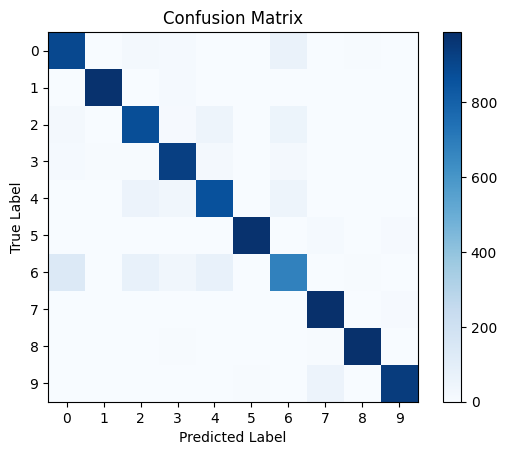

[[894   0  17  15   3   1  63   1   6   0]
 [  0 979   0  15   2   0   2   0   2   0]
 [ 16   1 873   9  48   0  53   0   0   0]
 [ 15   6   7 928  23   0  19   0   2   0]
 [  1   0  55  32 864   0  48   0   0   0]
 [  0   0   0   0   0 977   0  15   0   8]
 [134   1  73  32  76   0 677   0   7   0]
 [  0   0   0   0   0   3   0 988   0   9]
 [  2   1   0   4   1   2   2   4 983   1]
 [  0   0   0   0   0   5   1  55   0 939]]


In [11]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Make predictions on test data
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Compute confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix
plt.imshow(confusion_mtx, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, range(10))
plt.yticks(tick_marks, range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print(confusion_mtx)


##Linear readout

In [12]:
from tensorflow.keras.models import Model

def get_hidden_representation(layer_name):
    intermediate_layer_model = Model(inputs=model.input, outputs=model.get_layer(layer_name).output)
    intermediate_output = intermediate_layer_model.predict(x_train)
    return intermediate_output

In [13]:
#conv1_output = get_hidden_representation("conv1")
conv2_output = get_hidden_representation("conv2")
dense_output = get_hidden_representation("dense1")

1875/1875 [==============================] - 3s 1ms/step


In [16]:
linear_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(14, 14, 32)),
    tf.keras.layers.Dense(10, activation='softmax')
])

# compila il modello
linear_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
linear_model.fit(conv2_output, y_train,
          batch_size=64,
          epochs=10,
          validation_split=0.2)

Epoch 1/10
750/750 [==============================] - 4s 4ms/step - loss: 0.4557 - accuracy: 0.8706 - val_loss: 0.3074 - val_accuracy: 0.8995
Epoch 2/10
750/750 [==============================] - 2s 3ms/step - loss: 0.2695 - accuracy: 0.9098 - val_loss: 0.2674 - val_accuracy: 0.9102
Epoch 3/10
750/750 [==============================] - 3s 4ms/step - loss: 0.2328 - accuracy: 0.9213 - val_loss: 0.2500 - val_accuracy: 0.9149
Epoch 4/10
750/750 [==============================] - 3s 4ms/step - loss: 0.2109 - accuracy: 0.9287 - val_loss: 0.2438 - val_accuracy: 0.9154
Epoch 5/10
750/750 [==============================] - 2s 3ms/step - loss: 0.1960 - accuracy: 0.9337 - val_loss: 0.2345 - val_accuracy: 0.9175
Epoch 6/10
750/750 [==============================] - 3s 4ms/step - loss: 0.1838 - accuracy: 0.9382 - val_loss: 0.2311 - val_accuracy: 0.9178
Epoch 7/10
750/750 [==============================] - 3s 4ms/step - loss: 0.1740 - accuracy: 0.9415 - val_loss: 0.2273 - val_accuracy: 0.9202
Epoch 

In [18]:
# valuta il modello sul set di test
score_conv2 = linear_model.evaluate(conv2_output, y_test, verbose=0)
# stampa l'accuratezza del test
print('\n', 'Test accuracy of the linear model with conv2 input:', score_conv2[1])

ValueError: ignored

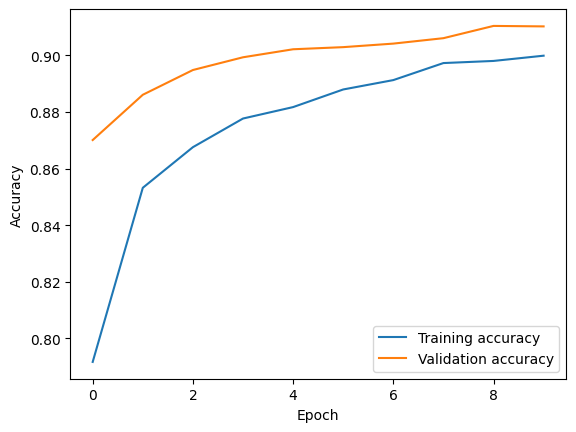

In [ ]:
# Get training and validation accuracy
train_acc = cnn_results.history['accuracy']
val_acc = cnn_results.history['val_accuracy']

# Plot accuracy curves
plt.plot(train_acc, label='Training accuracy')
plt.plot(val_acc, label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
#plt.ylim(0.6, 1)  # Set y-axis limits
plt.show()


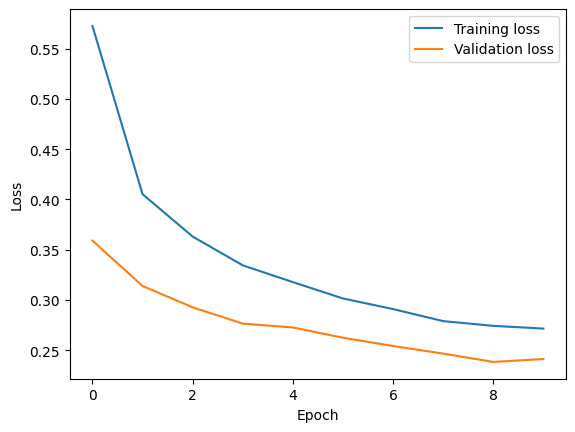

In [ ]:
# Get training and validation loss
train_loss = cnn_results.history['loss']
val_loss = cnn_results.history['val_loss']

# Plot loss curves
plt.plot(train_loss, label='Training loss')
plt.plot(val_loss, label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
